# testing readme.md examples

if anything here breaks, be sure to adjust the `README.md` (but you probably should not break the functionality demonstrated here)

In [ ]:
import matplotlib.pyplot as plt

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
from maze_dataset.tokenization import (
	MazeTokenizerModular,
	PromptSequencers,
)

To create a `MazeDataset`, you first create a `MazeDatasetConfig`:

In [ ]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test",  # name is only for you to keep track of things
	grid_n=5,  # number of rows/columns in the lattice
	n_mazes=4,  # number of mazes to generate
	maze_ctor=LatticeMazeGenerators.gen_dfs,  # algorithm to generate the maze
	maze_ctor_kwargs=dict(
		do_forks=False
	),  # additional parameters to pass to the maze generation algorithm
)

and then pass this config to the `MazeDataset.from_config` method:

In [3]:
dataset: MazeDataset = MazeDataset.from_config(cfg)

This method can search for whether a dataset with matching config hash already exists on your filesystem in the expected location, and load it if so. It can also generate a dataset on the fly if needed.

## Conversions to useful formats

The elements of the dataset are [`SolvedMaze`](maze_dataset/maze/lattice_maze.py) objects:

In [4]:
m = dataset[0]
type(m)

maze_dataset.maze.lattice_maze.SolvedMaze

Which can be converted to a variety of formats:

In [5]:
# visual representation as ascii art
print(m.as_ascii())

###########
# # # # # #
###########
# # # # # #
###########
#     #  E#
# ### ###X#
# # #   #X#
# #######X#
#        S#
###########


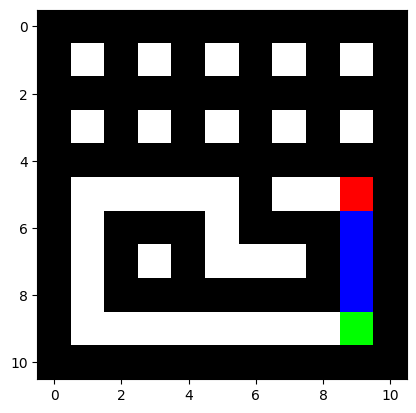

In [ ]:
# RGB image, optionally without solution or endpoints, suitable for CNNs

plt.imshow(m.as_pixels())

In [ ]:
# text format for autoreregressive transformers


m.as_tokens(
	maze_tokenizer=MazeTokenizerModular(
		prompt_sequencer=PromptSequencers.AOTP(),  # many options here
	)
)

['<ADJLIST_START>',
 '(4,3)',
 '<-->',
 '(4,4)',
 ';',
 '(4,0)',
 '<-->',
 '(4,1)',
 ';',
 '(2,2)',
 '<-->',
 '(3,2)',
 ';',
 '(2,0)',
 '<-->',
 '(2,1)',
 ';',
 '(3,4)',
 '<-->',
 '(4,4)',
 ';',
 '(3,0)',
 '<-->',
 '(2,0)',
 ';',
 '(3,3)',
 '<-->',
 '(3,2)',
 ';',
 '(2,3)',
 '<-->',
 '(2,4)',
 ';',
 '(4,3)',
 '<-->',
 '(4,2)',
 ';',
 '(3,4)',
 '<-->',
 '(2,4)',
 ';',
 '(4,1)',
 '<-->',
 '(4,2)',
 ';',
 '(3,0)',
 '<-->',
 '(4,0)',
 ';',
 '(2,1)',
 '<-->',
 '(2,2)',
 ';',
 '<ADJLIST_END>',
 '<ORIGIN_START>',
 '(4,4)',
 '<ORIGIN_END>',
 '<TARGET_START>',
 '(2,4)',
 '<TARGET_END>',
 '<PATH_START>',
 '(4,4)',
 '(3,4)',
 '(2,4)',
 '<PATH_END>']

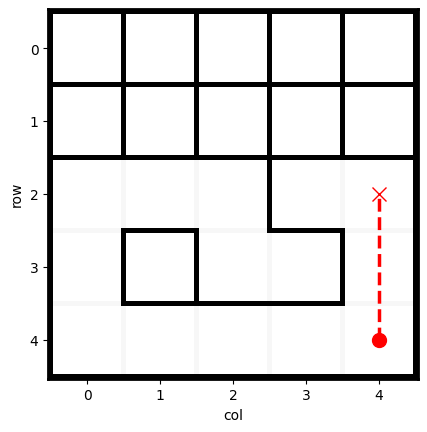

In [ ]:
# advanced visualization with many features

MazePlot(m).plot()